# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 8 апреля 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 8 апреля, -4 балла после 06:00 15 апреля, -6 баллов после 06:00 22 апреля  -8 баллов после 06:00 29 апреля.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)
%load_ext pycodestyle_magic

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



*** Что почитать по теории ***

Одна из лучших книг по ML $-$ "Pattern Recognition and Machine Learning" Bishop, Christopher. 

Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
* $$ w_{new} = w_{old} - 2\alpha\left(\frac{1}{n}X_{batch}^T(X_{batch}w_{old} - y_{batch}) + \frac{w_{old}}{C}\right) $$
* Если ошибка предсказания 0 - мы пришли, куда нужно, $X_{batch}w_{old} - y_{batch}$ зануляется, веса не меняются. Если не 0 - то мы обновляем веса.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?


***Ваше решение здесь***
* $$ w_{new} = w_{old} - \alpha\left(\frac{1}{n}X_{batch}^T(\sigma(X_{batch}w_{old})-y_{batch}) +  \frac{2w_{old}}{C}\right) $$
* Инуитивное описание такое же, как и в случае линейной регрессии. Формулы для градиентов очень похожи и отличаются лишь предсказанием модели.

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией

***Ваше решение здесь***
$$\frac{\partial Q(w)}{\partial w} = \frac{2}{N}X^TXw - 2X^Ty$$

$$\frac{\partial^2 Q(w)}{\partial w^2} = \frac{2}{N}X^TX$$
Матрица А называется положительно определенной, если $\forall x \ne 0: x^TAx > 0$

В нашем случае А это $X^TX$

$x^TX^TXx = (Xx)^TXx = z^Tz = \parallel z \parallel^2 \geq 0$

Пусть матрица Х имеет m строк и n столбцов, причем $m \geq n$ и имеет полный ранг, то есть n.

Нам нужно показать, что $Xx$ строго больше нуля. Пусть $Xx = 0$. Тогда мы имеем систему из m уравнений с n неизвестными. Так как все уравнения линейно независимы (полный ранг), система решений не имеет (кроме тривиального). Получаем, что гессиан положительно определен.

Точное решение для модели с L2 регуляризацией $$w = (X^TX+\frac{1}{C}I)^{-1}X^Ty $$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$$E(L | x_i) = -p\log a(x_i)  - (1-p)\log( 1 - a(x_i))$$
$$E'_a = -\frac{p}{a} + \frac{1-p}{1-a} = \frac{-p + ap + a - ap}{a(1-a)} = \frac{a-p}{a(1-a)}$$
$$E'_a = 0$$
$$a(x_i) = p(y_i = 1 |x_i)$$

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [7]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [8]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [9]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [10]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [39]:
#%%pycodestyle
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle is True:
        shuffle_index = np.arange(len(y))
        np.random.shuffle(shuffle_index)
        X = X[shuffle_index]
        y = y[shuffle_index]
    X_batch = np.empty((batch_size, X.shape[1]))
    y_batch = np.empty(batch_size)
    for i in range(100):
        batch_index = np.random.choice(len(y), size=batch_size, replace=False)
        X_batch = X[batch_index]
        y_batch = y[batch_index]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [38]:
#%%pycodestyle


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01,
                 max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'epoch': [], 'loss': []}
        self.model_type = model_type

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            a = np.matmul(X_batch, self.weights)
            loss = (np.mean((y_batch - a) ** 2) +
                    np.matmul(self.weights.T, self.weights)) / self.C
        if self.model_type == 'log_reg':
            a = sigmoid(np.matmul(X_batch, self.weights))
            loss = (-np.mean(y_batch * np.log2(a) +
                             (1 - y_batch) * np.log2(1 - a)) +
                    np.matmul(self.weights.T, self.weights) / self.C)
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            loss_grad = (np.mean(2 * X_batch *
                                 (np.matmul(X_batch, self.weights)
                                  - y_batch).reshape(-1, 1), axis=0)
                         + 2 * self.weights / self.C)
        if self.model_type == 'log_reg':
            a = sigmoid(np.matmul(X_batch, self.weights))
            loss_grad = np.mean(X_batch * (a - y_batch).reshape(-1, 1),
                                axis=0) + 2 * self.weights / self.C
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad

    def fit(self, X, y, batch_size=1):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        # Нужно инициализровать случайно веса
        X = np.concatenate((np.ones([len(X), 1]), X), axis=1)
        self.weights = np.random.randn(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size)
            epoch_mean_loss = 0
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                batch_loss = self.calc_loss(X_batch, y_batch)
                epoch_mean_loss += batch_loss
            epoch_mean_loss /= 100
            self.errors_log['epoch'].append(n)
            self.errors_log['loss'].append(epoch_mean_loss)

        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.concatenate((np.ones([len(X), 1]), X), axis=1)
        y_hat = np.zeros(len(np.matmul(X, self.weights)), dtype=int)
        if self.model_type == 'lin_reg':
            y_hat = (1 + np.sign(np.matmul(X, self.weights))) / 2
        if self.model_type == 'log_reg':
            for i, el in enumerate(sigmoid(np.matmul(X, self.weights))):
                if el > 0.5:
                    y_hat[i] = 1
                else:
                    y_hat[i] = 0
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [42]:
#%%pycodestyle
def plot_decision_boundary(clf):
    ## Your code Here
    q = np.array([-5, 8])
    func = (-(clf.weights[1] / clf.weights[2]) *
            q - clf.weights[0] / clf.weights[2])
    plt.plot(q, func, label=clf.model_type)

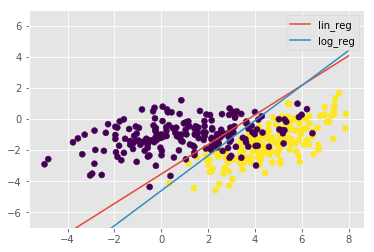

In [49]:
#%%pycodestyle
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

CLF1 = MySGDClassifier(batch_generator, C=1000, alpha=0.01,
                       max_epoch=100, model_type='lin_reg')
CLF1.fit(X, 2*y-1, batch_size=10)  # меняем метки на -1 и 1
CLF2 = MySGDClassifier(batch_generator, C=1000, alpha=0.01,
                       max_epoch=100, model_type='log_reg')
CLF2.fit(X, y, batch_size=10)
# plot_decision_boundary(your_model)
plt.scatter(X[:, 0], X[:, 1], c=y)
plot_decision_boundary(CLF1)
plot_decision_boundary(CLF2)
plt.ylim(-7, 7)
plt.legend()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [6]:
from sklearn.datasets import make_classification

In [7]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

Определял ошибку, усредненную по ста шагам. Тут под эпохой имеется ввиду 100 шагов.

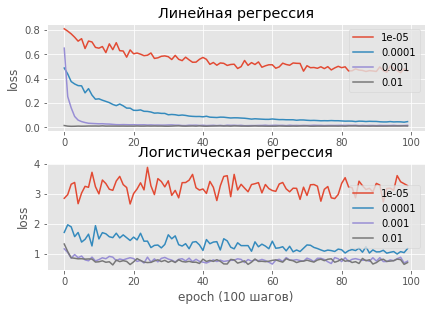

In [53]:
#%%pycodestyle
## Your Code Here
np.random.seed(0)
alphas = [0.00001, 0.0001, 0.001, 0.01]
fig = plt.figure()
p1 = fig.add_subplot(211)
p2 = fig.add_subplot(212)
for i in alphas:
    CLF1 = MySGDClassifier(batch_generator, 10, i,
                           max_epoch=100, model_type='lin_reg')
    CLF1.fit(X, y, batch_size=1)
    CLF2 = MySGDClassifier(batch_generator, 10, i,
                           max_epoch=100, model_type='log_reg')
    CLF2.fit(X, y, batch_size=1)
    p1.plot(CLF1.errors_log['epoch'], CLF1.errors_log['loss'], label=i)
    p2.plot(CLF2.errors_log['epoch'], CLF2.errors_log['loss'], label=i)
plt.tight_layout()
p1.set_ylabel('loss')
p1.set_title('Линейная регрессия')
p2.set_title('Логистическая регрессия')
p2.set_xlabel('epoch (100 шагов)')
p2.set_ylabel('loss')
p1.legend()
p2.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

При alpha = 0.00001 сходимость плохая, при остальных значениях довольно быстро сходится. Стоит брать 0.01

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

C:\Users\mserg\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
C:\Users\mserg\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
C:\Users\mserg\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: overflow encountered in true_divide
C:\Users\mserg\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in subtract


Text(12.5, 0.5, 'weights_mean')

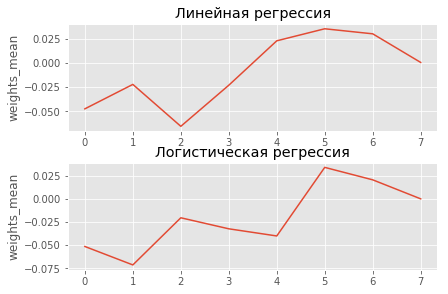

In [63]:
#%%pycodestyle
## Your Code Here
fig = plt.figure()
p1 = fig.add_subplot(211)
p2 = fig.add_subplot(212)
C_params = np.logspace(3, -3, 10)
weights_mean1 = []
weights_mean2 = []
for i in C_params:
    CLF1 = MySGDClassifier(batch_generator, i, alpha=0.01,
                           max_epoch=200, model_type='lin_reg')
    CLF1.fit(X, y, batch_size=100)
    CLF2 = MySGDClassifier(batch_generator, i, alpha=0.01,
                           max_epoch=200, model_type='lin_reg')
    CLF2.fit(X, y, batch_size=100)
    weights_mean1.append(np.mean(CLF1.weights))
    weights_mean2.append(np.mean(CLF2.weights))
p1.plot(list(range(10)), weights_mean1)
p2.plot(list(range(10)), weights_mean2)
plt.tight_layout()
p1.set_ylabel('weights_mean')
p1.set_title('Линейная регрессия')
p2.set_title('Логистическая регрессия')
p2.set_ylabel('weights_mean')

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

Веса уменьшились заметно

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview-2.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [56]:
#%%pycodestyle
doc_to_title = {}
with open('docs_titles.tsv', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print(len(doc_to_title))

28026


In [58]:
#%%pycodestyle
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [61]:
#%%pycodestyle
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print(X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [62]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

C:\Users\mserg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mserg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Разбиваем данные по группам в отношении примерно 60 к 40

In [65]:
Xtr = X_scaled[:7974]
ytr = y_train[:7974]
gtr = groups_train[:7974]
Xval = X_scaled[7974:]
yval = y_train[7974:]
gval = groups_train[7974:]

In [64]:
#%%pycodestyle
for model_type in ['lin_reg', 'log_reg']:
    for max_epoch in [30, 100, 300]:
        for alpha in [0.0001, 0.001, 0.01]:
            for batch_size in [100, 1000, 3000]:
                for C in [10, 100, 1000]:
                    CLF = MySGDClassifier(batch_generator,C=C,
                                          alpha=alpha,
                                          max_epoch=max_epoch,
                                          model_type=model_type)
                    CLF.fit(Xtr, ytr, batch_size=batch_size)
                    ypred = CLF.predict(Xval)
                    print('Params:', model_type, max_epoch, alpha, batch_size, C)
                    print('F1_score:', f1_score(yval, ypred))

Params: lin_reg 30 0.0001 100 10
F1_score: 0.4336545589325426
Params: lin_reg 30 0.0001 100 100
F1_score: 0.4460570875665215
Params: lin_reg 30 0.0001 100 1000
F1_score: 0.43372578807443984
Params: lin_reg 30 0.0001 1000 10
F1_score: 0.43852556480380495
Params: lin_reg 30 0.0001 1000 100
F1_score: 0.4345955249569707
Params: lin_reg 30 0.0001 1000 1000
F1_score: 0.41539763113367173
Params: lin_reg 30 0.0001 3000 10
F1_score: 0.43333333333333335
Params: lin_reg 30 0.0001 3000 100
F1_score: 0.4259344716197508
Params: lin_reg 30 0.0001 3000 1000
F1_score: 0.44217926186291745
Params: lin_reg 30 0.001 100 10
F1_score: 0.5027961362480935
Params: lin_reg 30 0.001 100 100
F1_score: 0.42739443872296606
Params: lin_reg 30 0.001 100 1000
F1_score: 0.36498973305954824
Params: lin_reg 30 0.001 1000 10
F1_score: 0.48914399800349384
Params: lin_reg 30 0.001 1000 100
F1_score: 0.4178804620793571
Params: lin_reg 30 0.001 1000 1000
F1_score: 0.4391227627930426
Params: lin_reg 30 0.001 3000 10
F1_score: 0

Выбираем следующие параметры в качестве оптимальных:
C=10, alpha=0.01, max_epoch=30, model_type='log_reg', batch_size=1000

In [12]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [13]:
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print(X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [14]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

C:\Users\mserg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mserg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
#%%pycodestyle
best_clf = MySGDClassifier(batch_generator, C=10,
                           alpha=0.01, max_epoch=30,
                           model_type='log_reg')
best_clf.fit(X_scaled, y_train, batch_size=1000)
y_pred = best_clf.predict(X_test)
pair = range(11691, 28318)
df = pd.DataFrame({'pair_id': pair, 'target': y_pred})
df.to_csv('sub.csv', index=False)

Скор на kaggle 0.56441 > Baseline (Sergey Mit, команда Нурсултан loss)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна. Если да, то Вы молодец!

# Контрольные вопросы
Постарайтесь максимально развернуто и честно ответить на вопросы. Они охватывают тему линейных моделей и скорее нужны преподавателям, чтобы понимать, что именно Вы усвоили плохо. Надеюсь, они подскажут, что именно в теме Вы не понимаете или наоборот порадают, что Вы все знаете ^_^

* Опишите основные, на Ваш взгляд,  отличия логистической регрессии от линейной регрессии. Почему, на ваш взгляд, задачу классификации решают логистической, а не линейной регрессией?

***Ваше ответ здесь***
Минимизируются разные функции потерь. Линейная регрессия предсказывает некоторое вещественное число, а логистическая - вещественное число от 0 до 1, которое можно интерпретировать как вероятность принадлежности объекта к классу. Для решения задачи классификации логлосс подходит лучше, так как чем более уверенный ответ дает модель (больше вероятность принадлежности), тем меньше штраф, и наоборот.

* Как Вы думаете, для каких типов задач (объем данных, число признаков, типы признаков) стоит отдавать предпочтение линейным моделям?

***Ваше ответ здесь***
Мне кажется, линейная регрессия подходит для любых задач в качетстве нулевого приближения и для первичного анализа данных - модель простая, обучается быстро, ее результаты легко интерпретировать. Минус линейной регрессии - она не находит взаимосвязи между признаками (например, площадь = длина * ширину)

* Пусть на обучении мы имеем выборку размера $N$, число признаков $D$. Чему равна алгоритмическая сложность одного шага градиентного спуска? Cтохастического градиентного спуска?  Сложность предсказания на одном объекте?

***Ваше ответ здесь***
Градиентный спуск: O(ND)
Стохастический градиентный спуск: O(D)
Предсказание на одном объекте: O(D)

* В чем преимущества стохастического градиентного спуска (в том числе мини-батч) над обычным градиентным спуском? В чем его недостатки? Рассмотрите несколько аспектов $-$ скорость сходимости, необходимость загрузки всех данных в оперативную память, сложность вычисления одного шага.

***Ваше ответ здесь***
Из преимуществ - меньшая сложность вычисления, не нужно запоминать все данные. Из недостатков - нужно больше шагов (но все равно быстрее по времени из-за меньшей вычислительной сложности), не гарантируется сходимость.

* Как Вы думаете, при обучении линейной модели с помощью SGD, ошибку на новом объекте стоит считать до итерации спуска на этом объекте или после? Почему Вы так думаете? Возможно, Вам будет интересно ознакомиться с http://hunch.net/~jl/projects/prediction_bounds/thesis/mathml/thesisse44.xml

***Ваше ответ здесь***
Думаю, что до, так как этот объект еще не повлиял на обновление, но при достаточно малом шаге - это не так важно.

* Как Вы думаете, во времена такого бума нейронных сетей, остаются ли популярными линейные модели, или это уже пережиток прошлого? Почему Вы так думаете?

***Ваше ответ здесь***
Интерпретация результатов нейронных сетей - задача сложная. А линейные модели интерпретируются легко, поэтому там, где важно правильно интерпретировать результат - линейные модели остаются актуальными.

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***
Все понятно, возможно было бы интересно рассмотреть еще какие-нибудь варианты оптимизации.

Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Все супер =)